<a href="https://colab.research.google.com/github/akssyd12/gachon-ml-2025/blob/main/_02_ml_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC_4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

-------------

# **1. 수치형 데이터 정제하기**

   
## 1. 결측치 파악하기

In [ ]:
# 판다스 불러오기
import pandas as pd

# 데이터 읽어오기
df=pd.read_csv("Clean_Dataset.csv")

# 지정 인덱스인 첫번째 칼럼(column) 삭제하기
df.drop([df.columns[0]], axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205425 entries, 0 to 205424
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           205425 non-null  object 
 1   flight            205425 non-null  object 
 2   source_city       205425 non-null  object 
 3   departure_time    205425 non-null  object 
 4   stops             205425 non-null  object 
 5   arrival_time      205425 non-null  object 
 6   destination_city  205425 non-null  object 
 7   class             205425 non-null  object 
 8   duration          205425 non-null  float64
 9   days_left         205425 non-null  int64  
 10  price             205425 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 17.2+ MB


In [ ]:
df.memory_usage()  # 각 열(column)이 차지하는 메모리 사용량(byte 단위)

,0
Index,132
airline,1643400
flight,1643400
source_city,1643400
departure_time,1643400
stops,1643400
arrival_time,1643400
destination_city,1643400
class,1643400
duration,1643400


In [ ]:
# 랜덤하게 결측치 생성하기
# 랜덤과 넘파이 불러오기
import random
import numpy as np

# 같은 결과 출력을 위해 시드 고정하기
random.seed(2025)
np.random.seed(2025)

# 랜덤한 위치에 결측치를 5000개를 포함한 데이터 df_na 생성하기(5,000개 결측치 생성)
df_na=df.copy()
for i in range(0,5000) :
    df_na.iloc[random.randint(0,300152), random.randint(0,10)]=np.nan

# 결측치 처리여부 확인을 위한 1번, 3번 인덱스 전체 결측치 처리하기(2개 결측치 생성)
df_na.iloc[1]=np.nan
df_na.iloc[3]=np.nan

IndexError: iloc cannot enlarge its target object

### 1) 결측치 존재 여부 확인하기

In [ ]:
# 데이터 정보 확인하기
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205425 entries, 0 to 205424
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           205425 non-null  object 
 1   flight            205425 non-null  object 
 2   source_city       205425 non-null  object 
 3   departure_time    205425 non-null  object 
 4   stops             205425 non-null  object 
 5   arrival_time      205425 non-null  object 
 6   destination_city  205425 non-null  object 
 7   class             205425 non-null  object 
 8   duration          205425 non-null  float64
 9   days_left         205425 non-null  int64  
 10  price             205425 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 17.2+ MB


### 2) 결측치 수 확인하기

In [ ]:
# 결측치 수 확인하기
df_na.isna().sum()
df_na.isnull().sum(axis=0)    # df_na.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


## 2. 결측치 처리하기

In [ ]:
# 데이터 변경에 대비하여 원본 데이터 복사하기
df_na_origin=df_na.copy()

### 1) 결측치 삭제하기

In [ ]:
# 결측치를 하나라도 가지는 행 모두 삭제하기
df_na=df_na.dropna()
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205425 entries, 0 to 205424
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           205425 non-null  object 
 1   flight            205425 non-null  object 
 2   source_city       205425 non-null  object 
 3   departure_time    205425 non-null  object 
 4   stops             205425 non-null  object 
 5   arrival_time      205425 non-null  object 
 6   destination_city  205425 non-null  object 
 7   class             205425 non-null  object 
 8   duration          205425 non-null  float64
 9   days_left         205425 non-null  int64  
 10  price             205425 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 17.2+ MB


In [ ]:
# 결측치 삭제하기전 원래 데이터 가져오기
df_na=df_na_origin.copy()

# 모든 데이터가 결측치인 행만 삭제하기
df_na=df_na.dropna(how='all')
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205425 entries, 0 to 205424
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           205425 non-null  object 
 1   flight            205425 non-null  object 
 2   source_city       205425 non-null  object 
 3   departure_time    205425 non-null  object 
 4   stops             205425 non-null  object 
 5   arrival_time      205425 non-null  object 
 6   destination_city  205425 non-null  object 
 7   class             205425 non-null  object 
 8   duration          205425 non-null  float64
 9   days_left         205425 non-null  int64  
 10  price             205425 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 17.2+ MB


In [ ]:
# 0번 인덱스 부터 5개의 데이터를 불러와서 1번 3번 인덱스 삭제 결과 확인하기
df_na.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### 2) 칼럼 제거하기

In [ ]:
# 결측치 삭제하기전 원래 데이터 가져오기
df_na=df_na_origin.copy()

# stops과 flight 제거하기
df_na=df_na.drop(['stops','flight'], axis=1)
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205425 entries, 0 to 205424
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           205425 non-null  object 
 1   source_city       205425 non-null  object 
 2   departure_time    205425 non-null  object 
 3   arrival_time      205425 non-null  object 
 4   destination_city  205425 non-null  object 
 5   class             205425 non-null  object 
 6   duration          205425 non-null  float64
 7   days_left         205425 non-null  int64  
 8   price             205425 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 14.1+ MB


### 3) 결측치 대체하기

In [ ]:
df_na=df_na_origin.copy()

# 칼럼별 평균값으로 결측치 대체하기 ( median(), mode() )
df_na=df_na.fillna(df_na.mean(numeric_only=True))           # 모든 컬럼에 대해서 적용
df_na['price'].fillna(df_na['price'].mean(), inplace=True)  # 특정 컬럼을 해당 컬럼의 평균값으로 대체
df_na.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205425 entries, 0 to 205424
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           205425 non-null  object 
 1   flight            205425 non-null  object 
 2   source_city       205425 non-null  object 
 3   departure_time    205425 non-null  object 
 4   stops             205425 non-null  object 
 5   arrival_time      205425 non-null  object 
 6   destination_city  205425 non-null  object 
 7   class             205425 non-null  object 
 8   duration          205425 non-null  float64
 9   days_left         205425 non-null  int64  
 10  price             205425 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 17.2+ MB


/tmp/ipython-input-1646689715.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_na['price'].fillna(df_na['price'].mean(), inplace=True)  # 특정 컬럼을 해당 컬럼의 평균값으로 대체


In [ ]:
# 0번 인덱스부터 5개의 데이터를 불러와서 1번과 3번 인덱스의 대체 결과 확인하기
df_na.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# SimpleImputer 객체로 결측치 대체하기
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
df_na["duration"] = mean_imputer.fit_transform(df_na[["duration"]])
df_na.head()

In [ ]:
# bfill을 이용한 결측치 대체하기
# (method : 결측값을 변경할 방식
# - bfill로 할경우 결측값을 바로 아래 값과 동일하게 변경
# - ffill로 할 경우 결측값을 바로 위 값과 동일하게 변경
df_na=df_na.fillna(method='bfill')
df_na.info()

In [ ]:
#0번 인덱스부터 5개의 데이터를 불러와서 1번과 3번 인덱스의 대체 결과 확인하기
df_na.head()

## 3. 이상치 파악하기

### 1) z-score로 확인하기

In [ ]:
# Z-score를 기준으로 신뢰 수준이 95%인 데이터 확인하기
df[(abs((df['price']-df['price'].mean())/df['price'].std()))>1.96]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
61,Vistara,UK-747,Delhi,Early_Morning,one,Afternoon,Mumbai,Economy,6.50,1,13935
62,Vistara,UK-809,Delhi,Evening,one,Morning,Mumbai,Economy,12.42,1,14040
63,Vistara,UK-737,Delhi,Afternoon,one,Afternoon,Mumbai,Economy,21.08,1,14040
64,Vistara,UK-813,Delhi,Evening,one,Night,Mumbai,Economy,26.67,1,14093
65,Vistara,UK-817,Delhi,Evening,one,Night,Mumbai,Economy,28.17,1,14093
...,...,...,...,...,...,...,...,...,...,...,...
203806,Vistara,UK-836,Chennai,Morning,one,Night,Hyderabad,Economy,10.17,15,17631
203906,Vistara,UK-836,Chennai,Morning,one,Night,Hyderabad,Economy,10.17,16,14089
203907,Air_India,AI-766,Chennai,Morning,one,Night,Hyderabad,Economy,9.92,16,19580
204001,Vistara,UK-836,Chennai,Morning,one,Night,Hyderabad,Economy,10.17,17,14076


In [ ]:
df[(abs((df['duration']-df['duration'].mean())/df['duration'].std()))>1.96]
df[(abs((df['days_left']-df['days_left'].mean())/df['days_left'].std()))>1.96]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


### 2) IQR(Inter Quartile Range)로 확인하기

In [ ]:
# IQR 기준 이상치 확인하는 함수 만들기
def findOutliers(x, column):

    # 제1사분위수 q1 구하기
    q1 = x[column].quantile(0.25)

    # 제3사분위수 q3 구하기
    q3 = x[column].quantile(0.75)

    # IQR의 1.5배수 IQR
    iqr = q3 - q1
    iqr = 1.5 * iqr

    # 제3사분위수에서 IQR의 1.5배보다 크거나
    # 제1사분위수에서 IQR의 1.5배보다 작은값만 저장한 데이터 y 만들기
    y=x[(x[column] > (q3 + iqr)) | (x[column] < (q1 - iqr))]

    # IQR기준 이상치 y 반환하기
    return len(y)

In [ ]:
# price, duration, days_left 에 대하여 IQR기준 이상치 개수 확인하기
print("price IQR Outliers : ",findOutliers(df,'price'))
print("duration IQR Outliers : ",findOutliers(df,'duration'))
print("days_left IQR Outliers : ",findOutliers(df,'days_left'))

price IQR Outliers :  13641
duration IQR Outliers :  2646
days_left IQR Outliers :  0


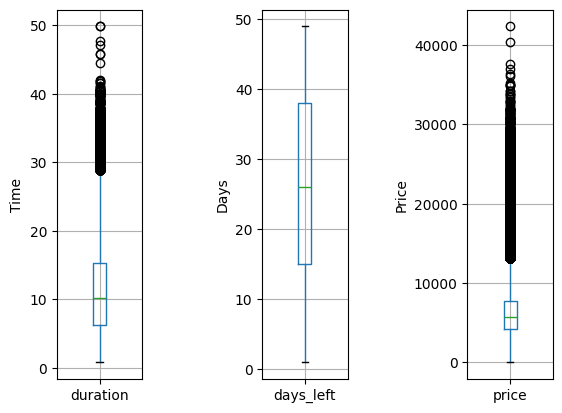

In [ ]:
# 시각화를 위해 matplotlib.pyplot 불러오기
import matplotlib.pyplot as plt

plt.figure()
# 첫 번째 subplot : 1행 5열로 나눈영역에서 첫번째 영역
plt.subplot(151)
df[['duration']].boxplot()
plt.ylabel("Time")

# 두 번째 subplot : 1행 5열로 나눈영역에서 세번째 영역
plt.subplot(153)
df[['days_left']].boxplot()
plt.ylabel("Days")

# 세 번째 subplot : 1행 5열로 나눈영역에서 다섯번째 영역
plt.subplot(155)
df[['price']].boxplot()
plt.ylabel("Price")
plt.show()

## 4. 이상치 처리하기

In [ ]:
# 데이터 변형에 대비하여 데이터 원본 복사해두기
df_origin=df.copy()

### 1) 이상치 데이터 삭제하기

In [ ]:
# 신뢰도 95% 기준 이상치 Index 추출하기
outlier=df[(abs((df['price']-df['price'].mean())/df['price'].std()))>1.96].index

# 추출한 인덱스의 행 삭제해서 clean_df 데이터 만들기
clean_df=df.drop(outlier)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194696 entries, 0 to 205424
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           194696 non-null  object 
 1   flight            194696 non-null  object 
 2   source_city       194696 non-null  object 
 3   departure_time    194696 non-null  object 
 4   stops             194696 non-null  object 
 5   arrival_time      194696 non-null  object 
 6   destination_city  194696 non-null  object 
 7   class             194696 non-null  object 
 8   duration          194696 non-null  float64
 9   days_left         194696 non-null  int64  
 10  price             194696 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 17.8+ MB


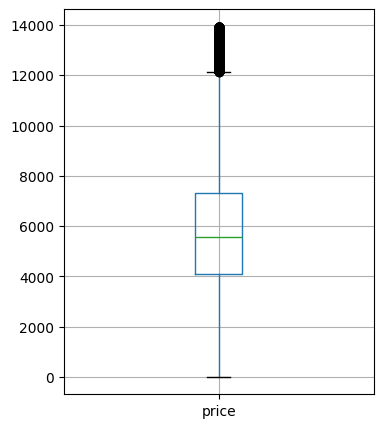

In [ ]:
plt.figure(figsize=(4,5))

# 박스 그래프 활용하여 이상치 제거 여부 확인하기
clean_df[['price']].boxplot()
plt.show()

### 2) 이상치 데이터 대체하기

In [ ]:
# IQR 기준 이상치를 대체하는 함수 만들기
def changeOutliers(x, column):

    # 제1사분위수 q1 구하기
    q1 = x[column].quantile(0.25)

    # 제3사분위수 q3 구하기
    q3 = x[column].quantile(0.75)

    # IQR의 1.5배수 IQR 구하기
    iqr = 1.5 * (q3 - q1)

    # 이상치를 대체할 Min, Max값 설정하기
    Min =(q1 - iqr)
    Max = q3 + iqr

    # Max보다 크값은 Max로, Min보다 작은값은 Min으로 대체하기
    x.loc[(x[column] > Max), column]= Max
    x.loc[(x[column] < Min), column]= Min

    # x리턴하기
    return(x)

# price에 대하여 이상치 대체하기
clean_df=changeOutliers(df, 'price')
clean_df.info()

In [ ]:
# price에 대하여 IQR기준 이상치 개수 확인하기
print("price IQR Outliers : ",findOutliers(clean_df,'price'))

price IQR Outliers :  7962


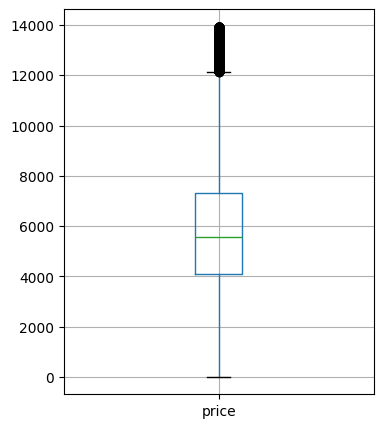

In [ ]:
plt.figure(figsize=(4,5))

# 박스그래프 활용하여 이상치 대체 여부 확인하기
clean_df[['price']].boxplot()
# plt.boxplot(df['price'])
plt.show()

## 5. 구간화(binning)하기

### 1) 동일 길이로 구간화하기

In [ ]:
# 비행시간을 0~5, 5~10, 10 이상의 3개의 구간으로 나누어 거리(distance)) 칼럼 생성하기
df['distance']=pd.cut(df['duration'], bins=[0,5,10,df['duration'].max()], labels=['short','medium' ,'long'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,distance
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,short
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,short
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,short
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,short
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,short


In [ ]:
# 거리 칼럼의 빈도분포 확인하기
df['distance'].value_counts()

,count
distance,
long,104397
medium,65134
short,35894


### 2) 동일 개수로 구간화하기

In [ ]:
# 항공권 가격(price)를 4개 구간으로 동일하게 나누어 항공권 가격 비율 칼럼 생성하기
df['price_rate']=pd.qcut(df['price'], 4, labels=['cheap','nomal' ,'expensive', 'too expensive'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,distance,price_rate
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,short,expensive
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,short,expensive
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,short,expensive
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,short,expensive
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,short,expensive


In [ ]:
# 항공권 가격 비율 칼럼의 빈도 분포 확인하기
df['price_rate'].value_counts()

,count
price_rate,
expensive,51477
cheap,51448
nomal,51266
too expensive,51234


-------------------

# **2. 범주형 데이터 정제하기**

## 1. 레이블 인코딩 하기

### 1) 판다스에서 레이블 인코딩하기

In [ ]:
# df.info()
df.select_dtypes(include='object').columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

In [ ]:
df['airline']
pd.factorize(df["airline"])[0]


array([0, 0, 1, ..., 2, 2, 5])

In [ ]:
# 데이터 구간화 전 원본 불러오기
df=df_origin.copy()

# factorize로 airline 칼럼 레이블 인코딩하기
df["label_encoding"] = pd.factorize(df["airline"])[0].reshape(-1,1)
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,label_encoding
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0


In [ ]:
pd.factorize(df["airline"])

(array([0, 0, 1, ..., 2, 2, 5]),
 Index(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo', 'Air_India'], dtype='object'))

In [ ]:
# airline 칼럼과 새롭게 만들어진 label_encoding 칼럼의 빈도표 확인하기
print(df['airline'].value_counts())
print(df['label_encoding'].value_counts())

airline
Vistara      66759
Air_India    47766
Indigo       42681
GO_FIRST     23158
AirAsia      16055
SpiceJet      9006
Name: count, dtype: int64
label_encoding
2    66759
5    47766
4    42681
3    23158
1    16055
0     9006
Name: count, dtype: int64


### 2) 사이킷런으로 레이블 인코딩하기

In [ ]:
# 사이킷런 패키지의 LabelEncoder 불러오기
from sklearn.preprocessing import LabelEncoder

# LabelEncoder로 airline 칼럼 레이블 인코딩하기
le = LabelEncoder()
# le = le.fit(df['airline'])
# df["airline_Label_Encoder"] = le.transform(df['airline'])
df["airline_Label_Encoder"] = le.fit_transform(df['airline'])
df.head(2)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,label_encoding,airline_Label_Encoder
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,4
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,4


In [ ]:
# LabelEncoder로 airline 칼럼 레이블 인코딩하기
le = LabelEncoder()
df["airline_Label_Encoder"] = le.fit_transform(df['airline'])
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,label_encoding,airline_Label_Encoder
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,4
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,4


In [ ]:
# airline 칼럼과 새롭게 만들어진 airline_Label_Encoder 칼럼의 빈도표 확인하기
print(df['airline'].value_counts())
print(df['airline_Label_Encoder'].value_counts())

airline
Vistara      66759
Air_India    47766
Indigo       42681
GO_FIRST     23158
AirAsia      16055
SpiceJet      9006
Name: count, dtype: int64
airline_Label_Encoder
5    66759
1    47766
3    42681
2    23158
0    16055
4     9006
Name: count, dtype: int64


In [ ]:
# 레이블 인코딩 역변환(디코딩)하기
le.inverse_transform(df["airline_Label_Encoder"]).reshape(-1,1)

array([['SpiceJet'],
       ['SpiceJet'],
       ['AirAsia'],
       ...,
       ['Vistara'],
       ['Vistara'],
       ['Air_India']], dtype=object)

## 2. 원핫 인코딩 하기

### 1) 판다스에서 원핫 인코딩하기

In [ ]:
df['class'].unique()
df['class'].value_counts()

,count
class,
Economy,205425


In [ ]:
#레이블 인코딩 전 원본데이터 불러오기
df=df_origin.copy()

#class 칼럼을 원핫인코딩 하기
pd.get_dummies(df['class'])            # 결과가 True/False로 나타남
pd.get_dummies(df['class'], dtype=int)

,Economy
0,1
1,1
2,1
3,1
4,1
...,...
205420,1
205421,1
205422,1
205423,1


In [ ]:
# 원핫 인코딩 결과를 데이터에 반영하기
# 원핫인코딩 적용하면 원래 컬럼은 없어지고 새로운 컬럼이 만들어진다.
df=pd.get_dummies(df, columns=['class','airline'], dtype=int)
df.head()

,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,class_Economy,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,SG-8709,Delhi,Evening,zero,Night,Mumbai,2.17,1,5953,1,0,0,0,0,1,0
1,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,2.33,1,5953,1,0,0,0,0,1,0
2,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,2.17,1,5956,1,1,0,0,0,0,0
3,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,2.25,1,5955,1,0,0,0,0,0,1
4,UK-963,Delhi,Morning,zero,Morning,Mumbai,2.33,1,5955,1,0,0,0,0,0,1


### 2) 사이킷런으로 원핫 인코딩하기

In [ ]:
df=df_origin.copy()

#사이킷런 패키지에서 OneHotEncoder 불러오기
from sklearn.preprocessing import OneHotEncoder

#OneHotEncoder로 원핫 인코딩 하기
oh = OneHotEncoder()
encoder = oh.fit_transform(df['class'].values.reshape(-1,1)).toarray()
print(encoder)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
#판다스 원핫인코딩 전 원본데이터 불러오기
df=df_origin.copy()

#사이킷런 패키지에서 OneHotEncoder 불러오기
from sklearn.preprocessing import OneHotEncoder

#OneHotEncoder로 원핫 인코딩 하기
oh = OneHotEncoder()
encoder = oh.fit_transform(df['class'].values.reshape(-1,1)).toarray()

#원핫인코딩 결과를 데이터프레임으로 만들기
df_OneHot = pd.DataFrame(encoder,
                         columns=["class_" + str(oh.categories_[0][i]) for i in range (len(oh.categories_[0]))])

#원핫 인코딩 결과를 원본 데이터에 붙여넣기
df1 = pd.concat([df, df_OneHot], axis=1)
df1.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,class_Economy
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,1.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,1.0


-------------------------------

# **3. 스케일링**

## 1. 정규화하기

In [ ]:
# 원핫 인코딩 전 원본데이터 불러오기
df=df_origin.copy()

# 수치형 데이터만 분리하여 데이터프레임 만들기
df_num = df[['duration', 'days_left', 'price']]

# 정규화 수식적용하기
df_num = (df_num - df_num.min())/(df_num.max()-df_num.min())
df_num.head()

,duration,days_left,price
0,0.027347,0.0,0.140489
1,0.030612,0.0,0.140489
2,0.027347,0.0,0.140560
3,0.028980,0.0,0.140536
4,0.030612,0.0,0.140536


In [ ]:
# 요약 데이터 확인해서 정규화 적용 확인하기
df_num.describe()

,duration,days_left,price
count,205425.000000,205425.000000,205425.000000
mean,0.218782,0.521403,0.155492
std,0.147728,0.281449,0.088453
min,0.000000,0.000000,0.000000
25%,0.110612,0.291667,0.098855
50%,0.190612,0.520833,0.136309
75%,0.294286,0.770833,0.183327
max,1.000000,1.000000,1.000000


### 사이킷런으로 정규화하기

In [ ]:
# Min-Max 스케일링을 적용할 컬럼
df_num = df[['duration', 'days_left', 'price']]

from sklearn.preprocessing import MinMaxScaler
# Min-Max 스케일링 적용
minmax_scaler = MinMaxScaler()
df_minmax = minmax_scaler.fit_transform(df_num)
print(type(df_minmax))

# Min-Max 스케일링이 완료된 데이터를 데이터프레임 형태로 변환
df_minmax = pd.DataFrame(df_minmax,
                            index=df_num.index,
                            columns=df_num.columns)
df_minmax.head()

<class 'numpy.ndarray'>


,duration,days_left,price
0,0.027347,0.0,0.140489
1,0.030612,0.0,0.140489
2,0.027347,0.0,0.140560
3,0.028980,0.0,0.140536
4,0.030612,0.0,0.140536


## 2. 표준화하기

In [ ]:
# 수치형 데이터만 분리하여 데이터프레임 만들기
df_num = df[['duration', 'days_left', 'price']]

# 표준화 수식 적용하기
df_num =(df_num  - df_num .mean())/df_num .std()
df_num.head()

,duration,days_left,price
0,-1.295863,-1.852564,-0.169611
1,-1.273760,-1.852564,-0.169611
2,-1.295863,-1.852564,-0.168810
3,-1.284811,-1.852564,-0.169077
4,-1.273760,-1.852564,-0.169077


In [ ]:
# 요약 데이터 확인해서 표준화 적용 확인하기
df_num.describe()

,duration,days_left,price
count,2.054250e+05,2.054250e+05,2.054250e+05
mean,2.120300e-17,1.145585e-16,-4.953132e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.480980e+00,-1.852564e+00,-1.757891e+00
25%,-7.322239e-01,-8.162610e-01,-6.403016e-01
50%,-1.906881e-01,-2.022916e-03,-2.168670e-01
75%,5.110980e-01,8.862368e-01,3.146957e-01
max,5.288217e+00,1.700475e+00,9.547493e+00


In [ ]:
# 기존의 duration, days_left, price 칼럼 삭제하기
df=df.drop(['duration', 'days_left', 'price'], axis=1)

# 표준화된 duration, days_left, price 칼럼 붙이기
df = pd.concat([df, df_num], axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,-1.295863,-1.852564,-0.169611
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,-1.273760,-1.852564,-0.169611
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,-1.295863,-1.852564,-0.168810
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,-1.284811,-1.852564,-0.169077
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,-1.273760,-1.852564,-0.169077


### 사이킷런으로 표준화하기

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standard 스케일링을 적용할 컬럼
df_num = df_origin[['duration', 'days_left', 'price']]

# Standard 스케일링 적용
standard_scaler = StandardScaler()
df_standard = standard_scaler.fit_transform(df_num)

# Standard 스케일링이 완료된 데이터를 데이터프레임 형태로 변환
df_standard = pd.DataFrame(df_standard,
                            index=df_num.index,
                            columns=df_num.columns)
df_standard.head()

,duration,days_left,price
0,-1.295866,-1.852569,-0.169611
1,-1.273763,-1.852569,-0.169611
2,-1.295866,-1.852569,-0.168810
3,-1.284815,-1.852569,-0.169077
4,-1.273763,-1.852569,-0.169077


----------------------

# **4. 변수 선택하기**

## 1. 신규 변수 생성하기

### 1) 하나의 데이터로 여러 개의 새로운 칼럼 만들기

In [ ]:
df['flight'].value_counts()

,count
flight,
UK-706,1806
UK-720,1420
UK-772,1419
UK-836,1321
UK-822,1280
...,...
SG-8913,1
SG-8193,1
G8-107,1


In [ ]:
# 항공기 기종을 제조사 코드와 모델명으로 분리하는 split_flight 함수 만들기
def split_flight(flight) :
    # "-" 문자를 기준으로 앞쪽을 제조사 코드로 저장
    manufacture = flight.split("-")[0]
    # "-" 문자를 기준으로 뒤쪽을 모델명으로 저장
    model = flight.split("-")[1]
    # 제조사코드와 모델명을 리턴
    return manufacture, model

# df['flight']를 split_flight함수의 파라미터로 넣어 실행하는 lambda, apply를 적용하여 제조사코드와 모델명 반환하기
# zip 함수를 사용하여 튜플로 묶어 df['manufacture'], df['model_num']에 저장하기
# (무제한 인자받기: *-튜플 타입으로, **-딕셔너리 타입으로)
df['manufacture'], df['model_num'] = zip(  *df['flight'].apply(lambda x : split_flight(x))    )
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,manufacture,model_num
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,-1.295863,-1.852564,-0.169611,SG,8709
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,-1.273760,-1.852564,-0.169611,SG,8157
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,-1.295863,-1.852564,-0.168810,I5,764
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,-1.284811,-1.852564,-0.169077,UK,995
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,-1.273760,-1.852564,-0.169077,UK,963


In [ ]:
# 항공기 기종을 제조사 코드와 모델명으로 분리하는 split_flight 함수 만들기
def split_flight(flight) :
    # "-" 문자를 기준으로 앞쪽을 제조사 코드로 저장
    manufacture = flight.split("-")[0]
    # "-" 문자를 기준으로 뒤쪽을 모델명으로 저장
    model = flight.split("-")[1]
    # 제조사코드와 모델명을 리턴
    return manufacture, model

df['manufacture'], df['model_num']=zip(*df['flight'].apply(lambda x : split_flight(x)))
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,manufacture,model_num
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,-1.295863,-1.852564,-0.169611,SG,8709
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,-1.273760,-1.852564,-0.169611,SG,8157
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,-1.295863,-1.852564,-0.168810,I5,764
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,-1.284811,-1.852564,-0.169077,UK,995
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,-1.273760,-1.852564,-0.169077,UK,963


### 2) 여러 개의 데이터로 하나의 새로운 칼럼 만들기

In [ ]:
#source_city, destination_city를 튜블로 묶어 route 칼럼 생성하기
df['route']=df.apply(lambda x :(x['source_city'],x['destination_city']), axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,manufacture,model_num,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,-1.295863,-1.852564,-0.169611,SG,8709,"(Delhi, Mumbai)"
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,-1.273760,-1.852564,-0.169611,SG,8157,"(Delhi, Mumbai)"
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,-1.295863,-1.852564,-0.168810,I5,764,"(Delhi, Mumbai)"
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,-1.284811,-1.852564,-0.169077,UK,995,"(Delhi, Mumbai)"
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,-1.273760,-1.852564,-0.169077,UK,963,"(Delhi, Mumbai)"


In [ ]:
df.drop(['manufacture', 'model_num'], axis=1).head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,-1.295863,-1.852564,-0.169611,"(Delhi, Mumbai)"
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,-1.273760,-1.852564,-0.169611,"(Delhi, Mumbai)"
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,-1.295863,-1.852564,-0.168810,"(Delhi, Mumbai)"
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,-1.284811,-1.852564,-0.169077,"(Delhi, Mumbai)"
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,-1.273760,-1.852564,-0.169077,"(Delhi, Mumbai)"


## 2. 변수 선택하기

### 1) RFE(Recursive Feature Elimination)
모든 특성을 이용해 모델을 학습한 뒤, 중요도가 낮은 특성을 반복적으로 제거하면서 최적의 특성 subset을 선택하는 방법

### 2) RFE-CV(Recursive Feature Elimination with Cross Validation)
RFE 과정에서 교차 검증(Cross Validation)을 병행하여 자동으로 최적의 특성 개수를 선택하는 방법

### 3) UFS (Univariate Feature Selection)
각 특성과 목표 변수 간의 통계적 관계(예: χ², ANOVA F-test 등)를 개별적으로 계산하여, 상위 k개의 특성을 선택하는 간단한 방법